**<font color = black size=6>实验八:降维</font>**

本次实验为编写机器学习中的用于降维的PCA(主成分分析)算法。在本次实验中，我们将对一个维度过高的数据集进行降维。

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from pandas.core.frame import DataFrame

**<font color = blue size=4>第一部分:函数介绍</font>**

介绍一些可以用到的函数

1.计算方阵的特征值和特征向量

In [104]:
a=np.array([[1,0,0],[0,2,0],[0,0,3]])
vals,vecs=np.linalg.eig(a)
print("该矩阵的特征值:",vals)
print("该矩阵的特征向量:",vecs)

该矩阵的特征值: [1. 2. 3.]
该矩阵的特征向量: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2.排序函数

In [105]:
#list的排序
a=[3,1,2,4]
a.sort()
print(a)
#字典的排序
a=[3,1,2,4]
b=[[0,0,3,0],[1,0,0,0],[0,2,0,0],[0,0,0,4]]
c = [(a[i],b[i]) for i in range(len(a))]
print("未排序前:",c)
c=sorted(c)
print("排序后:",c)

[1, 2, 3, 4]
未排序前: [(3, [0, 0, 3, 0]), (1, [1, 0, 0, 0]), (2, [0, 2, 0, 0]), (4, [0, 0, 0, 4])]
排序后: [(1, [1, 0, 0, 0]), (2, [0, 2, 0, 0]), (3, [0, 0, 3, 0]), (4, [0, 0, 0, 4])]


**<font color = blue size=4>第二部分:实验任务</font>**

本任务使用train_data.csv数据集，共有九维特征.本次实验实现PCA算法，下面是PCA算法的伪代码

In [106]:
%%html
<img src="PCA Pseudocode.png", width=720, heigth=240>

**<font color = green size=3>1):降维</font>**

<span style="color:purple">1.将训练集"train_data.csv"导入，训练集共有167个样本，每个样本有9个特征值，将原始数据按列组成9行167列的矩阵X</span>

In [107]:
train_df = pd.read_csv('./train_data.csv')
print(train_df[:5])
print(len(train_df))

train_df_T = train_df.T
print(len(train_df_T))
print(train_df_T)

       0     1     2     3      4      5     6     7      8
0   90.2  10.0  7.58  44.9   1610   9.44  56.2  5.82    553
1   16.6  28.0  6.55  48.6   9930   4.49  76.3  1.65   4090
2   27.3  38.4  4.17  31.4  12900  16.10  76.5  2.89   4460
3  119.0  62.3  2.85  42.9   5900  22.40  60.1  6.16   3530
4   10.3  45.5  6.03  58.9  19100   1.44  76.8  2.13  12200
167
9
       0        1         2        3         4         5        6         7    \
0    90.20    16.60     27.30   119.00     10.30     14.50    18.10      4.80   
1    10.00    28.00     38.40    62.30     45.50     18.90    20.80     19.80   
2     7.58     6.55      4.17     2.85      6.03      8.10     4.40      8.73   
3    44.90    48.60     31.40    42.90     58.90     16.00    45.30     20.90   
4  1610.00  9930.00  12900.00  5900.00  19100.00  18700.00  6700.00  41400.00   
5     9.44     4.49     16.10    22.40      1.44     20.90     7.77      1.16   
6    56.20    76.30     76.50    60.10     76.80     75.80    73.30

<span style="color:purple">2.对所有样本进行中心化，即将X的每一行减去这一行的均值</span>

In [108]:
#your code here
X = train_df_T.apply(lambda row: row - row.mean(), axis=1)
print(X.shape)
print(X)

(9, 167)
            0            1            2             3            4    \
0     51.929940   -21.670060   -10.970060     80.729940   -27.970060   
1    -31.108976   -13.108976    -2.708976     21.191024     4.391024   
2      0.764311    -0.265689    -2.645689     -3.965689    -0.785689   
3     -1.990215     1.709785   -15.490215     -3.990215    12.009785   
4 -15534.688623 -7214.688623 -4244.688623 -11244.688623  1955.311377   
5      1.658168    -3.291832     8.318168     14.618168    -6.341832   
6    -14.355689     5.744311     5.944311    -10.455689     6.244311   
7      2.872036    -1.297964    -0.057964      3.212036    -0.817964   
8 -12411.155689 -8874.155689 -8504.155689  -9434.155689  -764.155689   

           5             6             7             8            9    ...  \
0   -23.770060    -20.170060    -33.470060    -33.970060     0.929940  ...   
1   -22.208976    -20.308976    -21.308976     10.191024    13.191024  ...   
2     1.284311     -2.415689      1.

<span style="color:purple">3.求出协方差矩阵$X$.$X^T$</span>

In [109]:
#your code here
convariance = X.dot(X.T)
print(convariance.shape)
print(convariance)

(9, 9)
              0             1             2             3             4  \
0  2.699862e+05 -5.837409e+04 -3.685191e+03 -2.061753e+04 -6.766757e+07   
1 -5.837409e+04  1.247354e+05 -1.430013e+03  8.123220e+04  4.533370e+07   
2 -3.685191e+03 -1.430013e+03  1.252489e+03  1.056613e+03  1.139037e+06   
3 -2.061753e+04  8.123220e+04  1.056613e+03  9.729330e+04  9.483368e+06   
4 -6.766757e+07  4.533370e+07  1.139037e+06  9.483368e+06  6.169289e+10   
5  2.040034e+04 -5.160953e+03 -1.230905e+03 -1.049268e+04 -4.998280e+06   
6 -5.278937e+04  1.280036e+04  8.543701e+02  1.943907e+03  1.741619e+07   
7  8.598993e+03 -2.204425e+03 -1.357595e+02 -9.676249e+02 -2.431191e+06   
8 -5.926969e+07  3.492283e+07  2.891383e+06  8.507508e+06  5.252954e+10   

              5             6             7             8  
0  2.040034e+04 -5.278937e+04  8.598993e+03 -5.926969e+07  
1 -5.160953e+03  1.280036e+04 -2.204425e+03  3.492283e+07  
2 -1.230905e+03  8.543701e+02 -1.357595e+02  2.891383e+06  
3 

<span style="color:purple">4.对协方差矩阵$X$.$X^T$做特征值分解，即求出协方差矩阵的特征值$\vec{\lambda}=\{\lambda_1,\lambda_2,...,\lambda_d\}$及对应的特征向量$\vec{\omega}=\{\omega_1,\omega_2,...,\omega_d\}$. 其中$\lambda_i \sim \omega_i$.</span>

In [110]:
#your code here
vals,vecs=np.linalg.eig(convariance)
print("该矩阵的特征值:",vals)
print("该矩阵的特征向量:",vecs)

vals = pd.Series(vals)
val_sorted = vals.sort_values(ascending=False)

print(val_sorted)

该矩阵的特征值: [1.11342747e+11 6.11653233e+09 2.07662463e+05 1.62903834e+05
 2.24346102e+04 1.21999805e+04 2.13848213e+03 1.01593379e+02
 7.03486236e+02]
该矩阵的特征向量: [[ 8.07327698e-04 -5.57055026e-04  9.25215339e-01  3.28783999e-01
  -3.94786565e-02  6.08330796e-02  1.72243208e-01  2.86316097e-02
   1.14007614e-02]
 [-5.11348092e-04  9.41707964e-04 -2.28627282e-01  6.52814366e-01
   5.94987240e-01  4.01990656e-01 -2.82287999e-02 -9.11761528e-04
   7.18179698e-02]
 [-2.52724061e-05 -2.15627987e-04 -9.25844014e-03 -7.58649598e-03
  -7.77516009e-02 -5.54312529e-02  3.77513839e-03 -2.20880747e-02
   9.95106331e-01]
 [-1.14384869e-04  5.41883715e-05 -2.42704100e-01  6.78156522e-01
  -5.29179120e-01 -4.41412073e-01  4.82031359e-02 -1.18487096e-03
  -6.32323521e-02]
 [-7.26746756e-01  6.86903991e-01  1.17358496e-03 -4.12812338e-04
  -6.84017169e-04 -1.95004065e-04  2.11994794e-05 -1.24806993e-05
   7.34940532e-05]
 [ 7.65998651e-05  2.85616792e-04  8.73842384e-02 -2.19844970e-02
   5.95872597e-01 -7.

<span style="color:purple">5.选取降维后的维度k：依据特征值计算方差的贡献率，先将所有特征值按照降序进行排序。要求降维后的数据方差占比超过阈值t%，公式如下. 我们这里取阈值为t%=99%:
    $$\frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^k\lambda_i} \geq t\%$$
</span>

In [118]:
#your code here

k = 0
t = 0.99

_variance = 0
variance = vals.sum()
while(_variance/variance<t):
    _variance += val_sorted[k]
    k += 1
    
print(f'k={k}')
assert k<=len(vals)




k=2


<span style="color:purple">6.将特征向量按对应特征值大小从上到下按行排列，取前k个对应特征值最大的特征向量组成投影矩阵W=($\omega_1,\omega_2,...,\omega_k$)</span>

In [119]:
#your code here

w_index = val_sorted[:k].index
print(w_index)
w = vecs[w_index]
print(w)

Int64Index([0, 1], dtype='int64')
[[ 8.07327698e-04 -5.57055026e-04  9.25215339e-01  3.28783999e-01
  -3.94786565e-02  6.08330796e-02  1.72243208e-01  2.86316097e-02
   1.14007614e-02]
 [-5.11348092e-04  9.41707964e-04 -2.28627282e-01  6.52814366e-01
   5.94987240e-01  4.01990656e-01 -2.82287999e-02 -9.11761528e-04
   7.18179698e-02]]


<span style="color:purple">7.根据公式$Y=P.X$得到降维到k维后的数据集Y。

In [113]:
#your code here
X_origin = train_df_T.copy()
print(w.shape)
print(X_origin.shape)
x_new = w@X_origin

print(x_new.shape)
print(x_new)





(5, 9)
(9, 167)
(5, 167)
           0            1            2            3             4    \
0   -24.992263  -309.894538  -430.005894  -163.985472   -576.648790   
1  1027.389484  6231.855516  8019.520651  3798.596540  12275.954195   
2   424.258814  3297.478404  3434.225310  3052.471777  10654.891975   
3  -859.810928 -5480.306663 -7091.568559 -3323.973959 -10837.210841   
4   -59.754504     0.665961    -1.968734   -47.482548     11.584622   

            5            6             7             8            9    ...  \
0   -593.671763  -195.682170  -1013.525530  -1130.954194  -540.034088  ...   
1  11880.849712  4247.297990  28369.638255  29098.524499  9955.007915  ...   
2   8794.514744  2682.725999  48427.061141  43311.365803  4566.624679  ...   
3 -10543.633325 -3719.355112 -25174.281116 -25792.893574 -8826.296581  ...   
4     -9.589072    -3.226296    -14.388549      6.005188    -1.707550  ...   

            157           158           159           160          161  \
0  -1

<span style="color:purple">8.请从降维的特征值选择其中两个（如果降维后不足二维，则跳过这部分）作为绘图的横纵坐标，将所有样本绘制到一张图中，其中同一聚类的样本点绘制为相同颜色</span>

<class 'pandas.core.frame.DataFrame'>
(5, 167)
(167,)


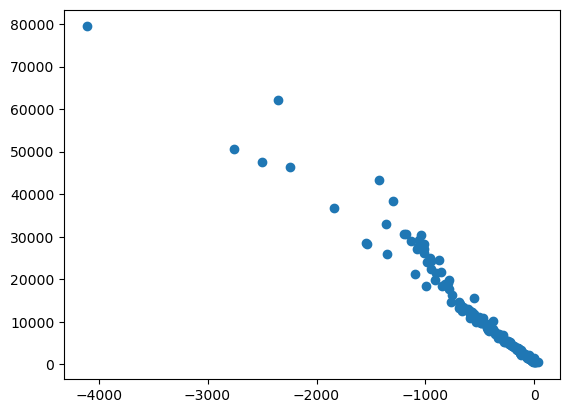

In [116]:
#your code here


assert x_new.shape[0] >=2
print(type(x_new))
print(x_new.shape)
x0 = x_new.iloc[0,:]
x1 = x_new.iloc[1,:]


fig = plt.figure()
plt.scatter(x0,x1)

plt.show()

**<font color = blue size=4>第三部分:作业提交</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、本次实验报告下周（11.10 14:20）交  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，提交时间为下周的实验课开始时，请注意及时提交。

实验八(降维)的实验报告:  
截止时间：2023-11-10 14:20  
提交地址：https://send2me.cn/U83-fI9G/T5Svof7YxaL6Ng

三、课堂课件获取地址:https://www.jianguoyun.com/p/Dag8kS8Qp5WhChjW06UFIAA  
实验内容获取地址:https://www.jianguoyun.com/p/Db5AxlgQp5WhChjY06UFIAA